In [4]:
#imports
#main.py

#import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch import nn, optim




In [5]:
normalized = transforms.Normalize((0.5,),(0.5,)) #normalizing the data, each value is a color. 2 values for grayscale images and 3 for RGB images
tensor = transforms.ToTensor()
transformation = transforms.Compose([tensor, normalized])

In [6]:
training_dataset = datasets.MNIST('/bytefiles', download=True, train=True, transform=transformation)
testing_dataset = datasets.MNIST('/bytefiles', download=True, train=False, transform=transformation)

train_data = torch.utils.data.DataLoader(training_dataset, batch_size=64, shuffle=True)
test_data = torch.utils.data.DataLoader(testing_dataset, batch_size=64, shuffle=True)

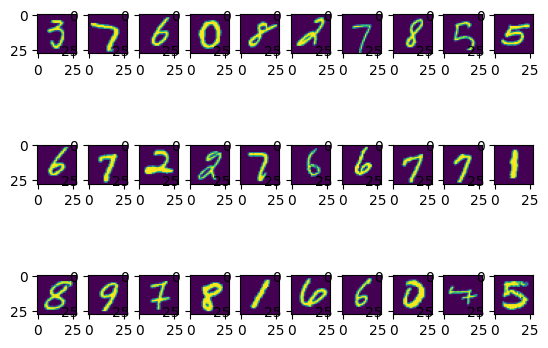

In [7]:
images, labels = next(iter(train_data))
for i in range(1, 31):
    plt.subplot(3,10, i)
    plt.subplots_adjust(wspace=0.3)
    plt.imshow(images[i].numpy().squeeze())


In [8]:
input_layer = 784
hidden_layer1 = 64
hidden_layer2 = 32
output_layer = 10


In [9]:
model = nn.Sequential(nn.Linear(input_layer, hidden_layer1),
nn.ReLU(),
nn.Linear(hidden_layer1,hidden_layer2),
nn.ReLU(),
nn.Linear(hidden_layer2, output_layer))


In [10]:
images = images.view(images.shape[0], -1)
outputs = model(images)
lossFunction = nn.CrossEntropyLoss()
loss = lossFunction(outputs, labels)


In [11]:
gradient_descent = optim.SGD(model.parameters(), lr=0.1)


In [12]:
#Magic" passes and back propagation(learning)
epochs = 20
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_data:
        images = images.view(images.shape[0], -1)
        # Feed-Forward
        gradient_descent.zero_grad()
        loss = lossFunction(model(images), labels)
        # Back Propagation
        loss.backward()
        # Optimize the weights
        gradient_descent.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(labels)
    print("Iteration : ", epoch+1, end = "\t")
    print("Loss: ", epoch_loss)

Iteration :  1	Loss:  968.3992107436061
Iteration :  2	Loss:  405.24281026795506
Iteration :  3	Loss:  296.62891215085983
Iteration :  4	Loss:  245.89519402384758
Iteration :  5	Loss:  214.22417543269694
Iteration :  6	Loss:  189.0800460577011
Iteration :  7	Loss:  166.00546160712838
Iteration :  8	Loss:  151.77817133255303
Iteration :  9	Loss:  136.85238868976012
Iteration :  10	Loss:  121.99714903510176
Iteration :  11	Loss:  119.5671016125707
Iteration :  12	Loss:  111.33048766897991
Iteration :  13	Loss:  106.46876014466397
Iteration :  14	Loss:  94.39737028372474
Iteration :  15	Loss:  94.21198828797787
Iteration :  16	Loss:  83.69953536149114
Iteration :  17	Loss:  80.96148828300647
Iteration :  18	Loss:  75.32415149267763
Iteration :  19	Loss:  71.66911879327381
Iteration :  20	Loss:  66.62686585413758


In [13]:
# Task 10: Get the Predicted Label
def get_predicted_label(image):
    image = image.view(1, 28*28)
    with torch.no_grad():
        prediction_score = model(image)
    return np.argmax(prediction_score)

images, labels = next(iter(test_data))
print("Predicted Label: ", 
get_predicted_label(images[0]))
print("Actual Label: ", labels.numpy()[0])



Predicted Label:  tensor(8)
Actual Label:  8


In [14]:
totalCount = 0
accurateCount = 0
for images, labels in test_data:
    for i in range(len(labels)):
        predictedLabel = get_predicted_label(images[i])
        actualLabel = labels.numpy()[i]
        print("Predicted Label: ", predictedLabel, " / Actual Label: ", actualLabel)
        if(predictedLabel == actualLabel):
            accurateCount += 1
    totalCount += len(labels)
print("Total images tested: : ", totalCount)
print("Accurate predictions: ", accurateCount)
print("Accuracy percentage: ", ((accurateCount/totalCount)*100), "%")


Predicted Label:  tensor(2)  / Actual Label:  2
Predicted Label:  tensor(8)  / Actual Label:  8
Predicted Label:  tensor(5)  / Actual Label:  5
Predicted Label:  tensor(6)  / Actual Label:  6
Predicted Label:  tensor(4)  / Actual Label:  4
Predicted Label:  tensor(3)  / Actual Label:  3
Predicted Label:  tensor(7)  / Actual Label:  7
Predicted Label:  tensor(1)  / Actual Label:  1
Predicted Label:  tensor(9)  / Actual Label:  9
Predicted Label:  tensor(0)  / Actual Label:  0
Predicted Label:  tensor(6)  / Actual Label:  6
Predicted Label:  tensor(7)  / Actual Label:  7
Predicted Label:  tensor(3)  / Actual Label:  3
Predicted Label:  tensor(0)  / Actual Label:  0
Predicted Label:  tensor(7)  / Actual Label:  7
Predicted Label:  tensor(0)  / Actual Label:  0
Predicted Label:  tensor(1)  / Actual Label:  1
Predicted Label:  tensor(3)  / Actual Label:  3
Predicted Label:  tensor(6)  / Actual Label:  6
Predicted Label:  tensor(0)  / Actual Label:  0
Predicted Label:  tensor(1)  / Actual La